In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

4.a. Membuka Gambar, 4.b menampilkan image

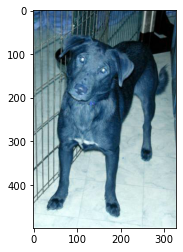

In [10]:
img = cv2.imread("pic.jpg")
plt.imshow(img)
plt.show()

4.c Menampilkan ukuran image

In [12]:
print(img.shape)

(499, 327, 3)


4.d Menampilkan nilai intensitas

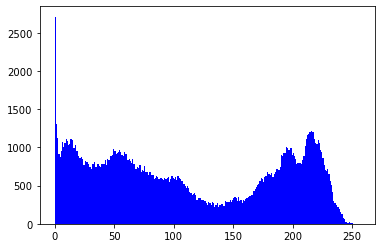

In [19]:
b,g,r = cv2.split(img) #split setiap layer R,G, dan B

plt.hist(b.ravel(),256, [0,256], color='b') #plot layer B
plt.show()

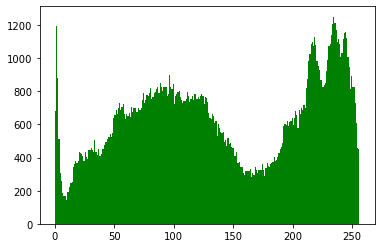

In [20]:
plt.hist(g.ravel(),256, [0,256], color='g') #plot layer G
plt.show()

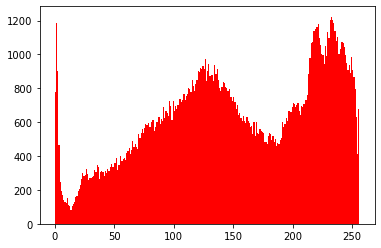

In [21]:
plt.hist(r.ravel(),256, [0,256], color='r') #plot layer R
plt.show()

4.e. Melaukukan beberapa operasi sederhana seperti rotasi, flip, zoom in/out, dll

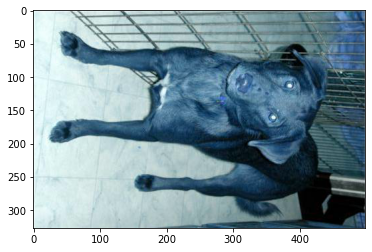

In [25]:
img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) #rotate 90 derajat searah jarum jam
plt.imshow(img_rotate)
plt.show()

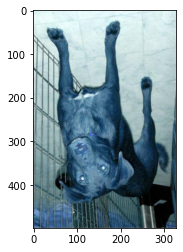

In [26]:
img_flip = cv2.flip(img, 0) #flip 0 = vertically, 1 horizontally, -1 = vertically + horizontally
plt.imshow(img_flip)
plt.show()

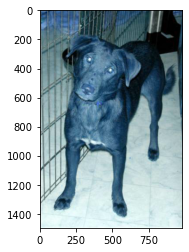

In [37]:
#scaleup
scale_percent = 300 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized)
plt.show()

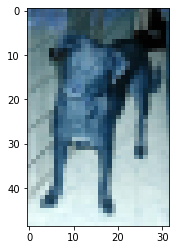

In [38]:
#scaledown
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized)
plt.show()

4.f. Melakukan beberapa operasi sederhana terhadap pixel seperti mengubah intensitas dll

<ipython-input-40-f53a35d3616e>:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)


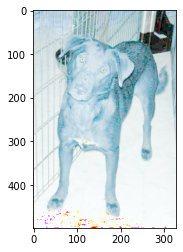

In [40]:
# Log Transformations
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Save the output. 
plt.imshow(log_transformed) 

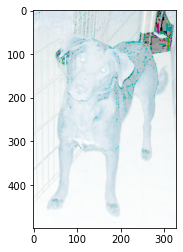

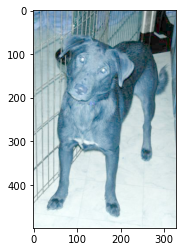

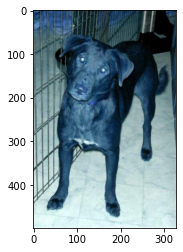

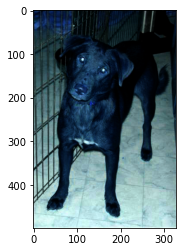

In [43]:
# Power-Law (Gamma) Transformation
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    plt.imshow(gamma_corrected) 
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


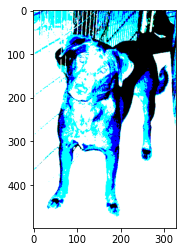

In [42]:
# Piecewise-Linear Transformation Functions
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
# Open the image. 
# img = cv2.imread('sample.jpg') 
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2) 
  
# Save edited image. 
plt.imshow(contrast_stretched)
plt.show()